Clustering analysis

In [217]:
import seaborn as sns; sns.set(color_codes=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [218]:
url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/Combined_data.csv'
df=pd.read_csv(url,index_col='FIPS',encoding="ISO-8859-1")

In [233]:
#remove variables with high correlation found in regression analysis
df=df[df.columns.difference(['Black','Hispanic','Asian','American Indian or Alaska Native',
                                    'Low_Access_Child','Low_Access_Seniors','Low_Access_low_income',
                                    'Very_low_insecurity'])]

In [241]:
#standardize data: (x-mean(x))/std
from sklearn import preprocessing
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

scaled_columns=[c for c in df.columns if is_numeric_dtype(df[c])]
df_for_scale=df[scaled_columns].dropna()
X=df_for_scale.values
scaler=  preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(X_scaled, index=df_for_scale.index, columns=df_for_scale.columns)

segmentation based on diabetes and obesity prevalence

In [201]:
df_for_scale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3098 entries, 1001 to 56045
Data columns (total 31 columns):
Low_Access_Overall                   3098 non-null float64
Low_Access_low_income                3098 non-null float64
Low_Access_Child                     3098 non-null float64
Low_Access_Seniors                   3098 non-null float64
Grocery                              3098 non-null float64
Supercenter                          3098 non-null float64
Convenience                          3098 non-null float64
Specialized                          3098 non-null float64
SNAP_store                           3098 non-null float64
WIC_store                            3098 non-null float64
Fast_food                            3098 non-null float64
Full_service                         3098 non-null float64
Assistance                           3098 non-null float64
Low_insecurity                       3098 non-null float64
Very_low_insecurity                  3098 non-null float64
Farm

In [212]:
corr=scaled_df.corr()

In [214]:
for idx in corr.index:
    for c in corr.columns:
        if corr[c][idx]>0.6 or corr[c][idx]<-0.6:
            print (c,idx)

Low_Access_Overall Low_Access_Overall
Low_Access_low_income Low_Access_Overall
Low_Access_Child Low_Access_Overall
Low_Access_Seniors Low_Access_Overall
Low_Access_Overall Low_Access_low_income
Low_Access_low_income Low_Access_low_income
Low_Access_Child Low_Access_low_income
Low_Access_Seniors Low_Access_low_income
Low_Access_Overall Low_Access_Child
Low_Access_low_income Low_Access_Child
Low_Access_Child Low_Access_Child
Low_Access_Seniors Low_Access_Child
Low_Access_Overall Low_Access_Seniors
Low_Access_low_income Low_Access_Seniors
Low_Access_Child Low_Access_Seniors
Low_Access_Seniors Low_Access_Seniors
Grocery Grocery
WIC_store Grocery
Supercenter Supercenter
Convenience Convenience
Specialized Specialized
SNAP_store SNAP_store
Grocery WIC_store
WIC_store WIC_store
Fast_food Fast_food
Full_service Full_service
Assistance Assistance
Low_insecurity Low_insecurity
Very_low_insecurity Low_insecurity
Low_insecurity Very_low_insecurity
Very_low_insecurity Very_low_insecurity
Farm Farm


In [235]:
import numpy as np

percentiles=np.percentile(df_for_scale['prevalence of diabetes'], [20, 40, 60, 80])

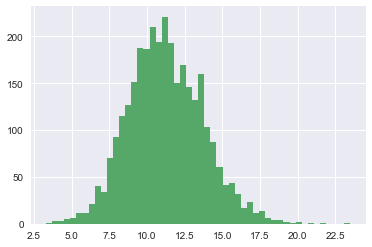

In [223]:
df_for_scale['prevalence of diabetes'].hist(bins=50)
plt.show()

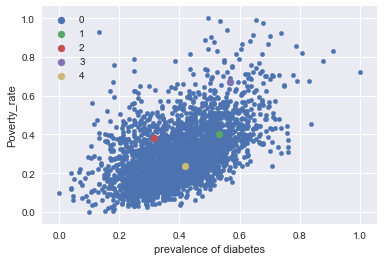

In [203]:
from sklearn.cluster import KMeans

#X='prevalence of diabetes'
#Y='Poverty_rate'

#K=5
#kmeans = KMeans(n_clusters=K, random_state=0).fit(scaled_df[[X, Y]])

#scaled_df[[X, Y]].plot(x=X,y=Y,kind='scatter')


#for i in range(K):
    #plt.scatter(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1], label=str(i))
#plt.legend()

#plt.show()  

#scaled_df['group']=kmeans.labels_
#df_for_scale['group']=kmeans.labels_

In [225]:
percentiles

array([  9.2,  10.5,  11.7,  13.3])

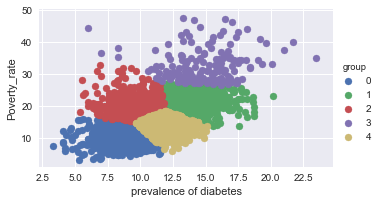

In [205]:
#import seaborn as sns

#fg = sns.FacetGrid(data=df_for_scale, hue='group', aspect=1.61)
#fg.map(plt.scatter, X, Y).add_legend()
#plt.show()

In [206]:
df_for_scale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3098 entries, 1001 to 56045
Data columns (total 32 columns):
Low_Access_Overall                   3098 non-null float64
Low_Access_low_income                3098 non-null float64
Low_Access_Child                     3098 non-null float64
Low_Access_Seniors                   3098 non-null float64
Grocery                              3098 non-null float64
Supercenter                          3098 non-null float64
Convenience                          3098 non-null float64
Specialized                          3098 non-null float64
SNAP_store                           3098 non-null float64
WIC_store                            3098 non-null float64
Fast_food                            3098 non-null float64
Full_service                         3098 non-null float64
Assistance                           3098 non-null float64
Low_insecurity                       3098 non-null float64
Very_low_insecurity                  3098 non-null float64
Farm

In [242]:
df_0=scaled_df[df_for_scale['prevalence of diabetes']<=percentiles[0]]
df_1=scaled_df[(df_for_scale['prevalence of diabetes']>=percentiles[0])&(df_for_scale['prevalence of diabetes']<percentiles[1])]
df_2=scaled_df[(df_for_scale['prevalence of diabetes']>=percentiles[1])&(df_for_scale['prevalence of diabetes']<percentiles[2])]
df_3=scaled_df[(df_for_scale['prevalence of diabetes']>=percentiles[2])&(df_for_scale['prevalence of diabetes']<percentiles[3])]
df_4=scaled_df[df_for_scale['prevalence of diabetes']>=percentiles[3]]

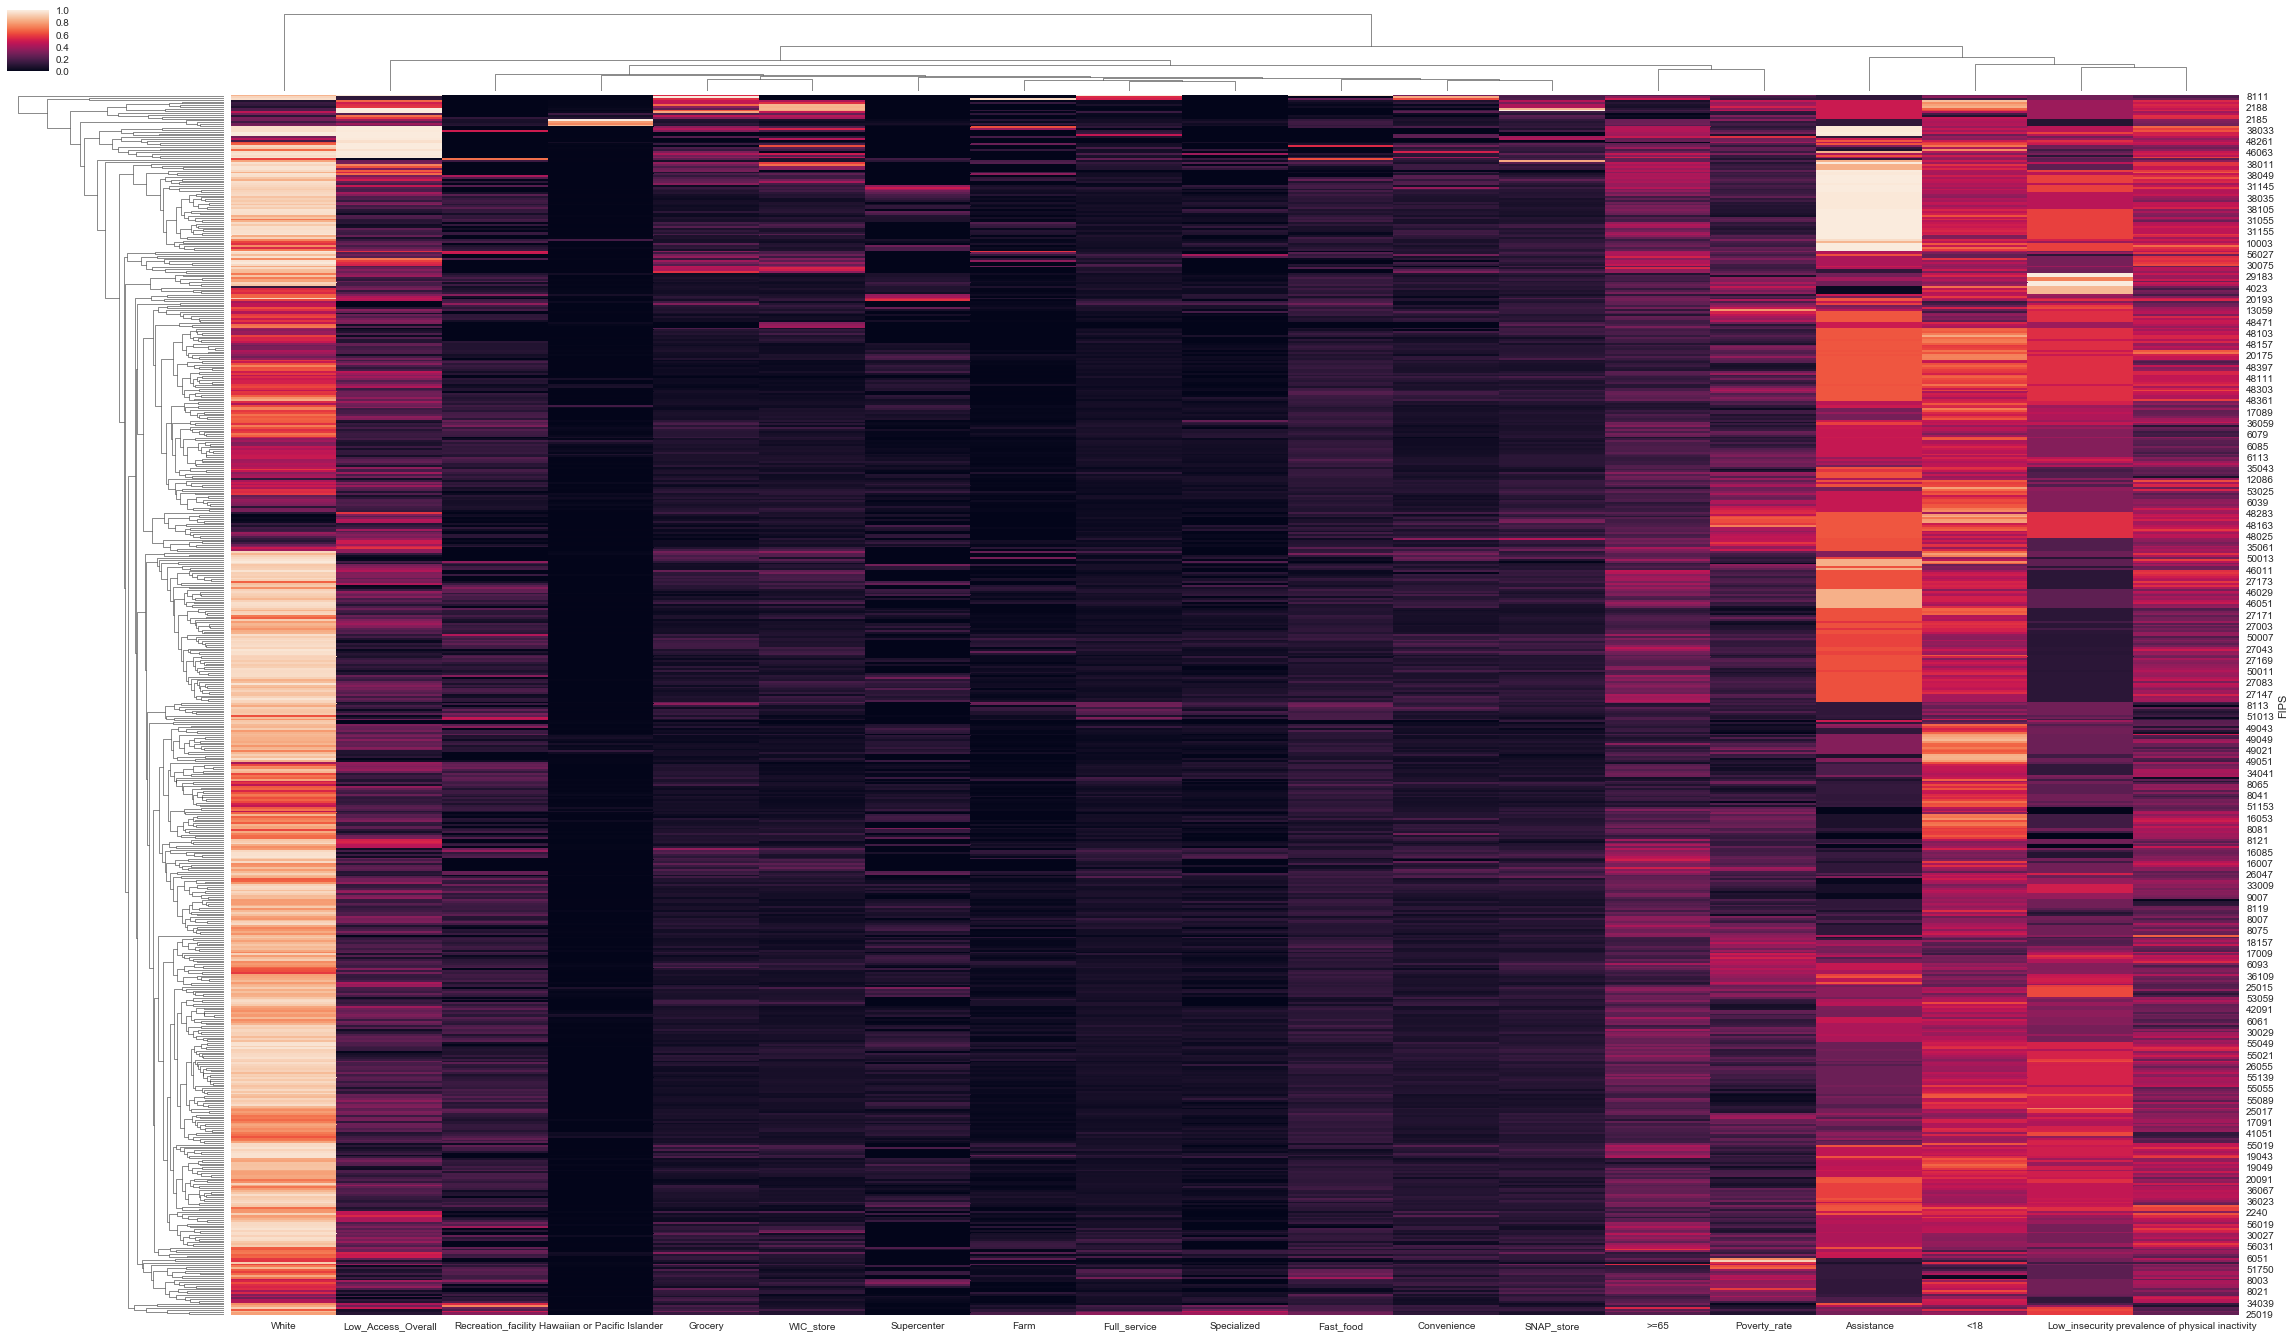

In [243]:
sns.clustermap(df_0[df_0.columns.difference(['prevalence of diabetes', 'Adult_ob','Adult_db', 'prevalence of obesity'])], figsize=(40,24))
plt.show()

In [174]:
df_2.shape

(446, 32)

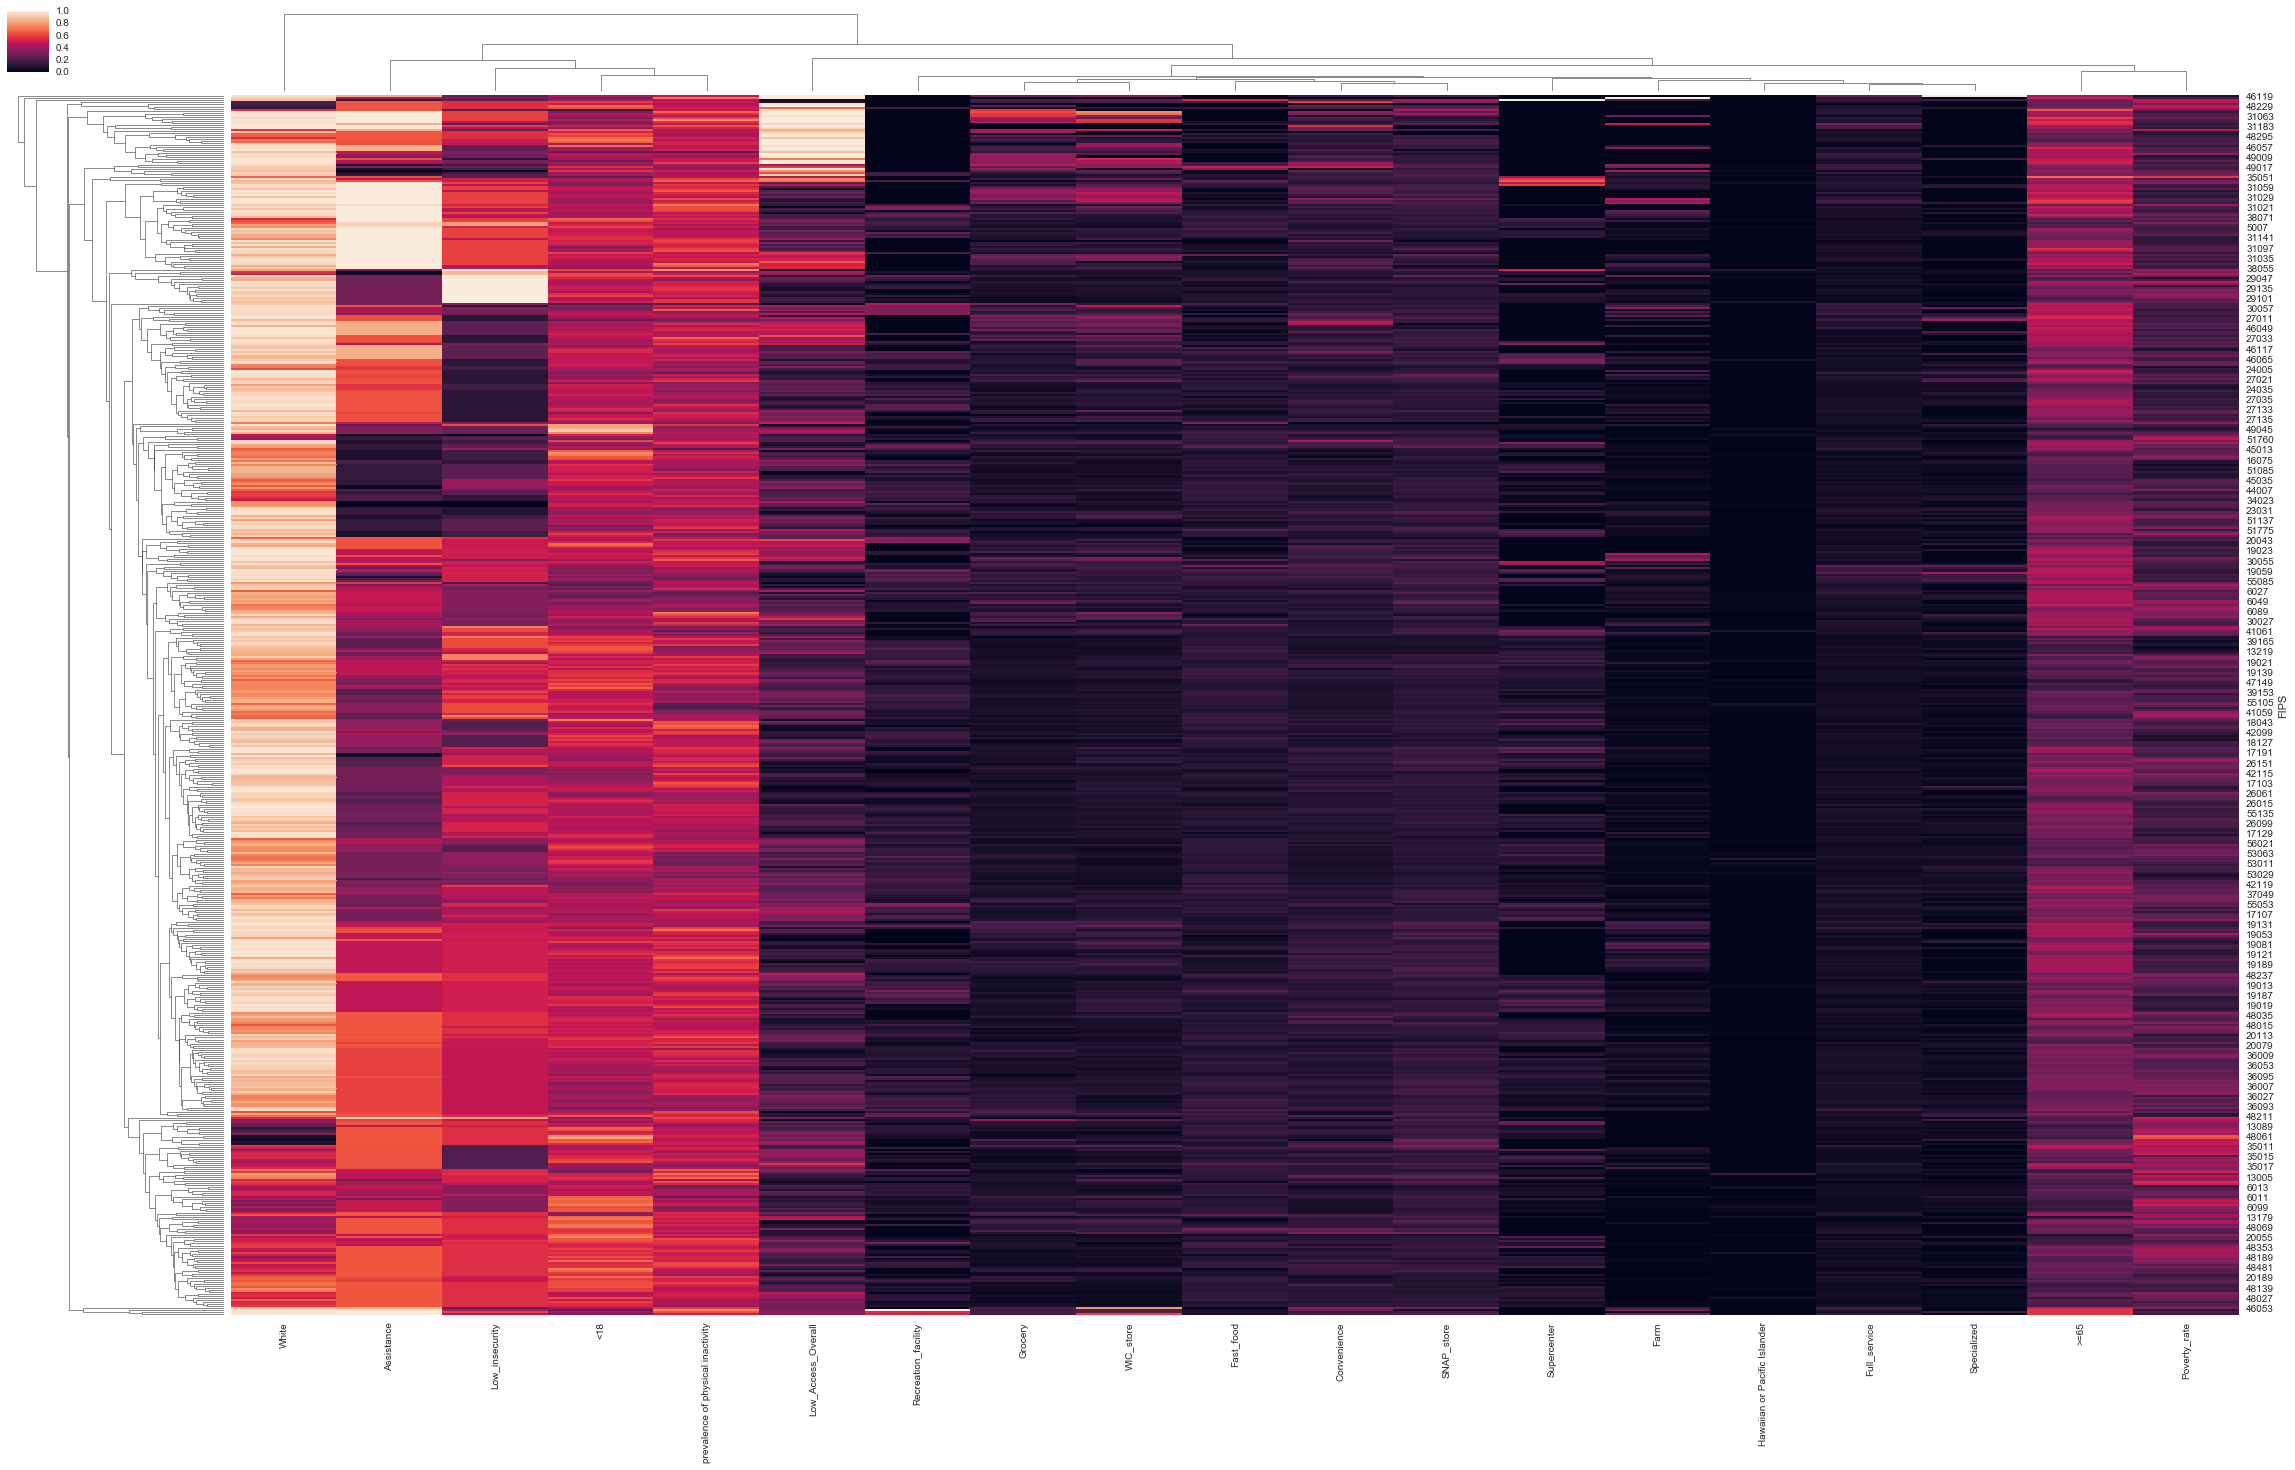

In [244]:
sns.clustermap(df_1[df_1.columns.difference(['prevalence of diabetes', 'Adult_ob','Adult_db', 'prevalence of obesity'])], figsize=(40,24))
plt.show()

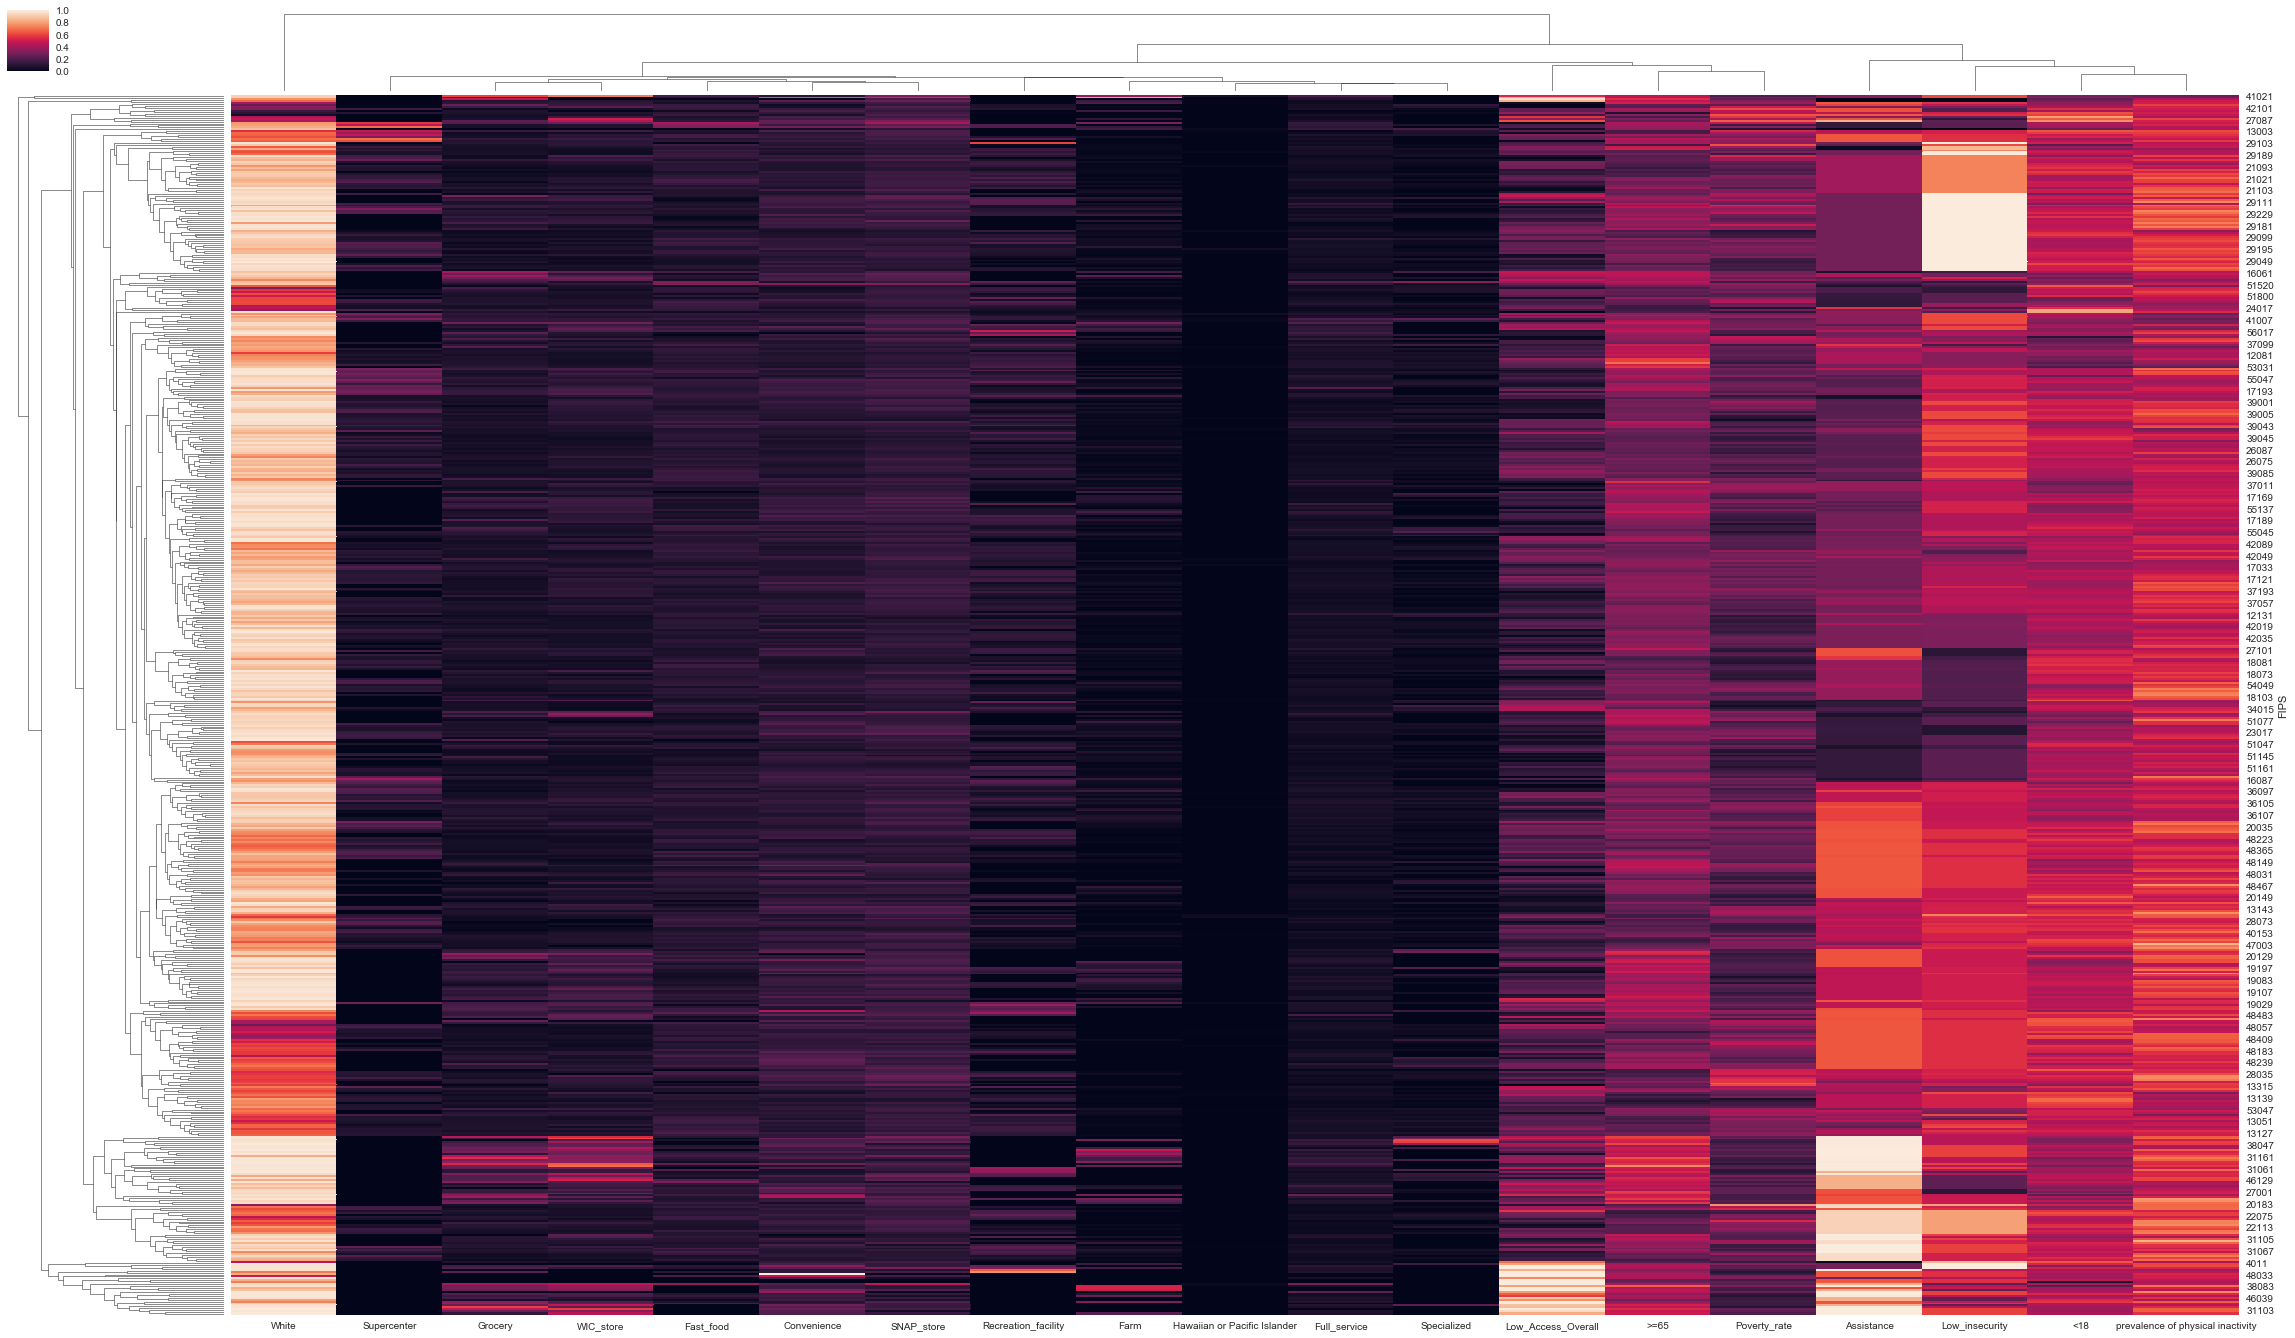

In [245]:
sns.clustermap(df_2[df_2.columns.difference(['prevalence of diabetes', 'Adult_ob','Adult_db', 'prevalence of obesity'])], figsize=(40,24))
plt.show()